In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas     as pd
import mplfinance as mpf

In [3]:
df = pd.read_csv('../data/yahoofinance-SPY-20080101-20180101.csv',index_col=0,parse_dates=True)
df = df.iloc[:150]

In [4]:
bucket_size = 0.0012 * max(df['Close'])
volprofile  = df['Volume'].groupby(df['Close'].apply(lambda x: bucket_size*round(x/bucket_size,0))).sum()

In [5]:
mc = mpf.make_marketcolors(base_mpf_style='yahoo')
s  = mpf.make_mpf_style(base_mpf_style='nightclouds',marketcolors=mc)

In [6]:
%%capture
fig, axlist = mpf.plot(df,type='candle',returnfig=True,style=s,tight_layout=True)
#vpax = fig.add_axes(axlist[0].get_position())
#vpax.set_axis_off()
#vpax.set_xlim(right=1.2*max(volprofile.values))
#vpax.barh(volprofile.keys().values,volprofile.values,height=0.75*bucket_size,align='center',color='cyan',alpha=0.45)

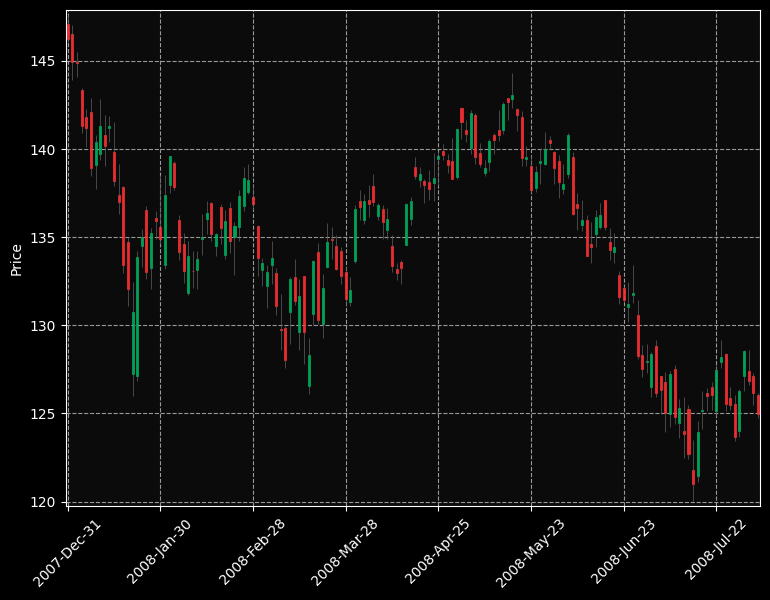

In [7]:
fig

In [8]:
df = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
df.head(2)
df.tail(2)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


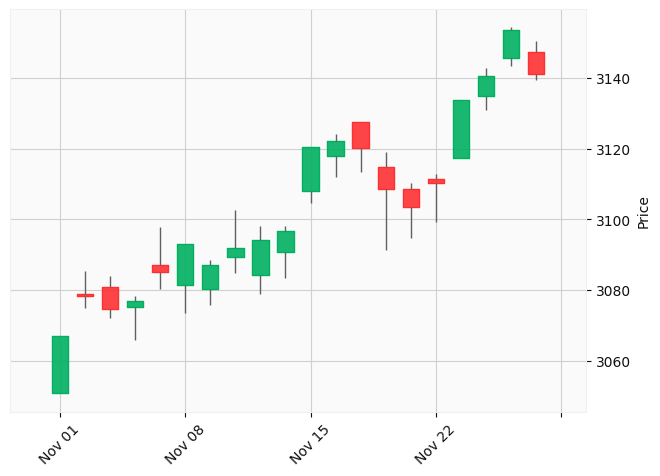

In [9]:
mpf.plot(df,type='candle',style='yahoo')

In [10]:
nans = [float('nan')]*len(df)
cdf = pd.DataFrame(dict(Open=nans,High=nans,Low=nans,Close=nans),index=df.index)

In [11]:
cdf.loc['2019-11-08'] = df.loc['2019-11-08']
cdf.loc['2019-11-15'] = df.loc['2019-11-15']
cdf.loc['2019-11-19'] = df.loc['2019-11-19']

In [12]:
mc = mpf.make_marketcolors(up='yellow',down='yellow')
s  = mpf.make_mpf_style(base_mpf_style='yahoo',marketcolors=mc)

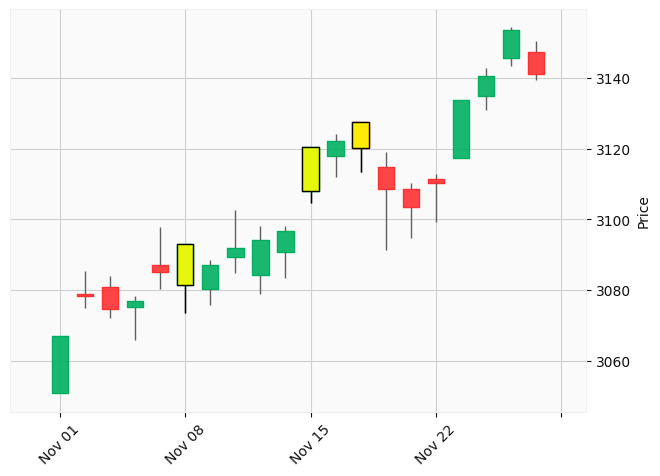

In [13]:
fig, axlist = mpf.plot(df,type='candle',style='yahoo',returnfig=True)
mpf.plot(cdf,type='candle',style=s,ax=axlist[0])

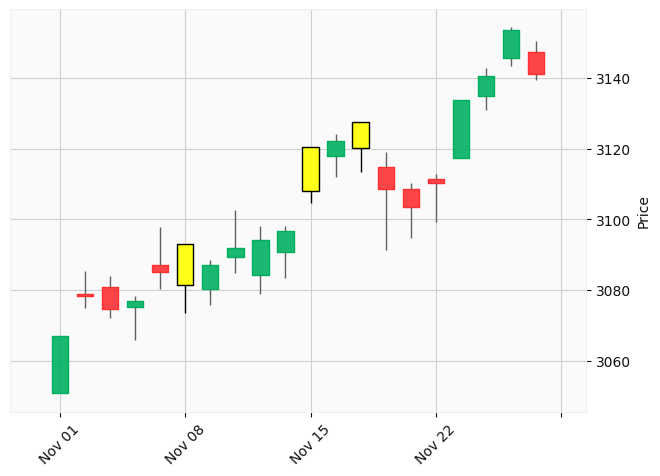

In [14]:
cdf.loc['2019-11-08'] = df.loc['2019-11-08'].copy()
cdf.loc['2019-11-15'] = df.loc['2019-11-15'].copy()
cdf.loc['2019-11-19'] = df.loc['2019-11-19'].copy()
df.loc['2019-11-08'] = nans[0]
df.loc['2019-11-15'] = nans[0]
df.loc['2019-11-19'] = nans[0]
#df
fig, axlist = mpf.plot(df,type='candle',style='yahoo',returnfig=True)
mpf.plot(cdf,type='candle',style=s,ax=axlist[0])